In [1]:
import sys
import os
import numpy as np
import sdeint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
L = 2.0
sigma = 2.0

In [3]:
N_PATHS = 5000
tspan = np.linspace(0.0, 5.0, 400)

In [4]:
paths = np.empty((N_PATHS, len(tspan)))

In [6]:
np.random.seed(42)
for i in range(N_PATHS):
    paths[i, :] = sdeint.itoint(f=lambda x, t: -L*x, G=lambda x, t: sigma, y0=np.random.normal(scale=3), tspan=tspan).flatten()

In [7]:
train_paths, test_paths = train_test_split(paths, shuffle=True, random_state=42, train_size=0.8)

In [8]:
np.save("./ou_train_paths.npy", train_paths)
np.save("./ou_test_paths.npy", test_paths)
np.save("./ou_tspan.npy", tspan)

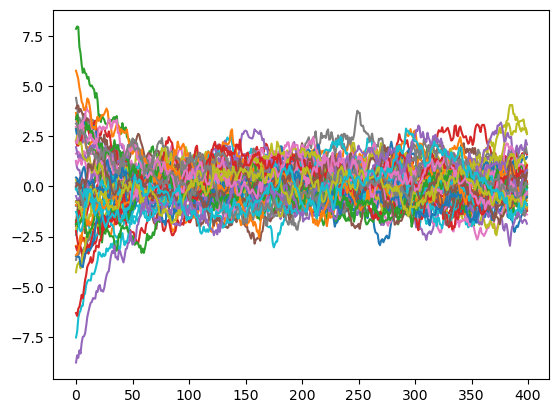

In [9]:
for i in range(50):
    plt.plot(test_paths[i, :])

In [10]:
bms = np.empty((N_PATHS // 5, len(tspan)))
np.random.seed(2022)
for i in range(bms.shape[0]):
    bms[i, :] = sdeint.itoint(f=lambda x, t: 0, G = lambda x, t: 1, y0=0, tspan=tspan).flatten()

In [11]:
np.save("./ou_test_bms.npy", bms)

In [12]:
train_bms = np.empty((len(train_paths), len(tspan)))
for i in range(train_bms.shape[0]):
    train_bms[i, :] = sdeint.itoint(f=lambda x, t: 0, G = lambda x, t: 1, y0=0, tspan=tspan).flatten()
    


In [13]:
np.save("./ou_train_bms.npy", train_bms)